In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [3]:
tips = pd.read_excel("tips.xlsx") 
tips.shape 

(244, 7)

In [4]:
df = tips.copy()

In [5]:
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.dtypes.value_counts()

object     4
float64    2
int64      1
Name: count, dtype: int64

In [7]:
df['tip'].value_counts()

tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64

In [8]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
X = df.drop("tip",axis=1)
y = df['tip']

In [10]:
X.dtypes.value_counts()

object     4
float64    1
int64      1
Name: count, dtype: int64

<Axes: >

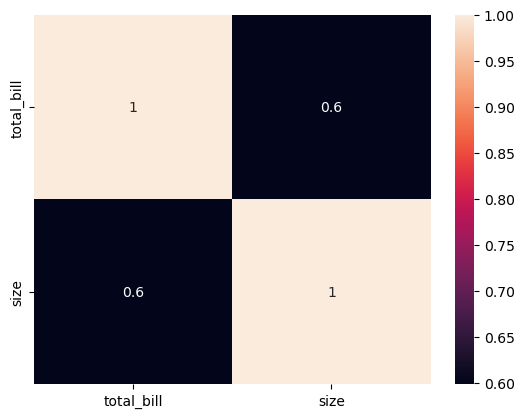

In [11]:
num_cols = X.select_dtypes(["int64","float64"])

sns.heatmap(num_cols.corr(),annot=True)

In [12]:
cat_cols = X.select_dtypes(["object"])

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

cat_cols_e = encoder.fit_transform(cat_cols)

cat_cols

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [13]:
cat_cols_e_df = pd.DataFrame(cat_cols_e,columns=cat_cols.columns,
                             index=cat_cols.index)




<Axes: >

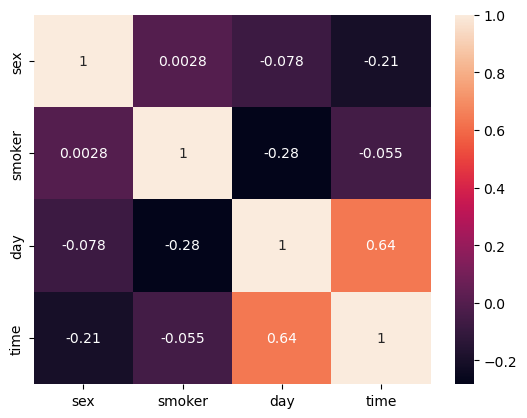

In [14]:
sns.heatmap(cat_cols_e_df.corr(),annot=True)

In [15]:
X_full = pd.concat([num_cols,cat_cols_e_df],axis=1)

X_full

,total_bill,size,sex,smoker,day,time
0,16.99,2,0.0,0.0,2.0,0.0
1,10.34,3,1.0,0.0,2.0,0.0
2,21.01,3,1.0,0.0,2.0,0.0
3,23.68,2,1.0,0.0,2.0,0.0
4,24.59,4,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...
239,29.03,3,1.0,0.0,1.0,0.0
240,27.18,2,0.0,1.0,1.0,0.0
241,22.67,2,1.0,1.0,1.0,0.0
242,17.82,2,1.0,0.0,1.0,0.0


<Axes: >

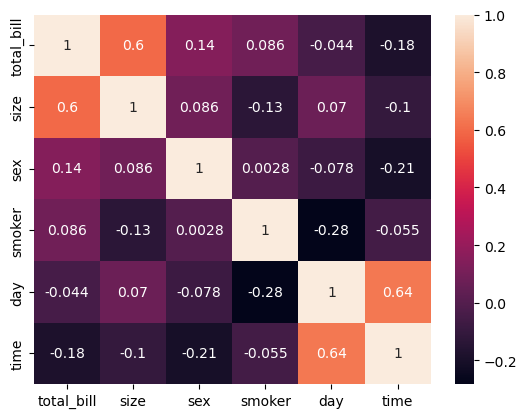

In [16]:
sns.heatmap(X_full.corr(),annot=True)

In [17]:
corr = X_full.join(y).corr()["tip"].drop("tip")

corre = corr.sort_values(key=abs,ascending=True)

corre

smoker        0.005929
day          -0.011548
sex           0.088862
time         -0.121629
size          0.489299
total_bill    0.675734
Name: tip, dtype: float64

<Axes: >

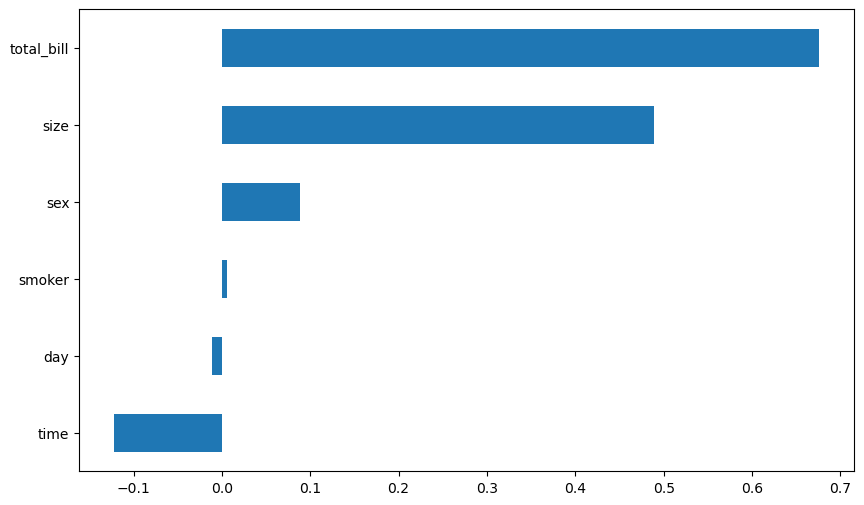

In [18]:
corre.sort_values().plot(kind="barh",figsize=(10,6))  

<Axes: ylabel='tip'>

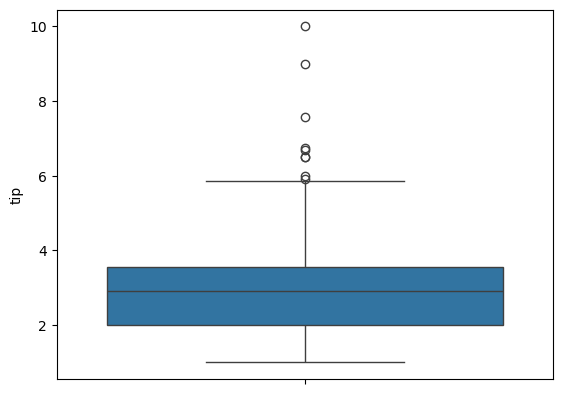

In [19]:
sns.boxplot(y)

In [20]:
y_log = np.log1p(y)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


In [22]:
numerical_features = make_column_selector(dtype_include=np.number)
non_numerical_features = make_column_selector(dtype_exclude=np.number)

In [23]:
numerical_pipeline = make_pipeline(RobustScaler(with_centering=False))

non_numerical_pipeline = make_pipeline(OneHotEncoder(),
                                       RobustScaler(with_centering=False))

In [24]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),
                                       (non_numerical_pipeline,non_numerical_features)) 

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler(with_centering=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7debd4965550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('robustscaler',
                                                  RobustScaler(with_centering=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7debd3708550>)])

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size=0.15,random_state=6)

In [26]:
X_train_washed = preprocessor.fit_transform(X_train,y_train)

In [27]:
X_test_washed = preprocessor.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

linear =  LinearRegression()

model = linear.fit(X_train_washed,y_train)

In [29]:
model.score(X_test_washed,y_test)

0.5153409517515133

## Assessment of the Model's Performance

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred = model.predict(X_test_washed)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.15479132314855787
MSE: 0.04206089160766513
RMSE: 0.2050875218234038
R2 Score: 0.5153409517515133


In [33]:
print("Actual tips:", y_test.iloc[0])
print("Predicted tips:", (y_pred[0]))

#print("Predicted tips:", np.expm1(y_pred[0]))

Actual tips: 1.3862943611198906
Predicted tips: 1.2727613055454616


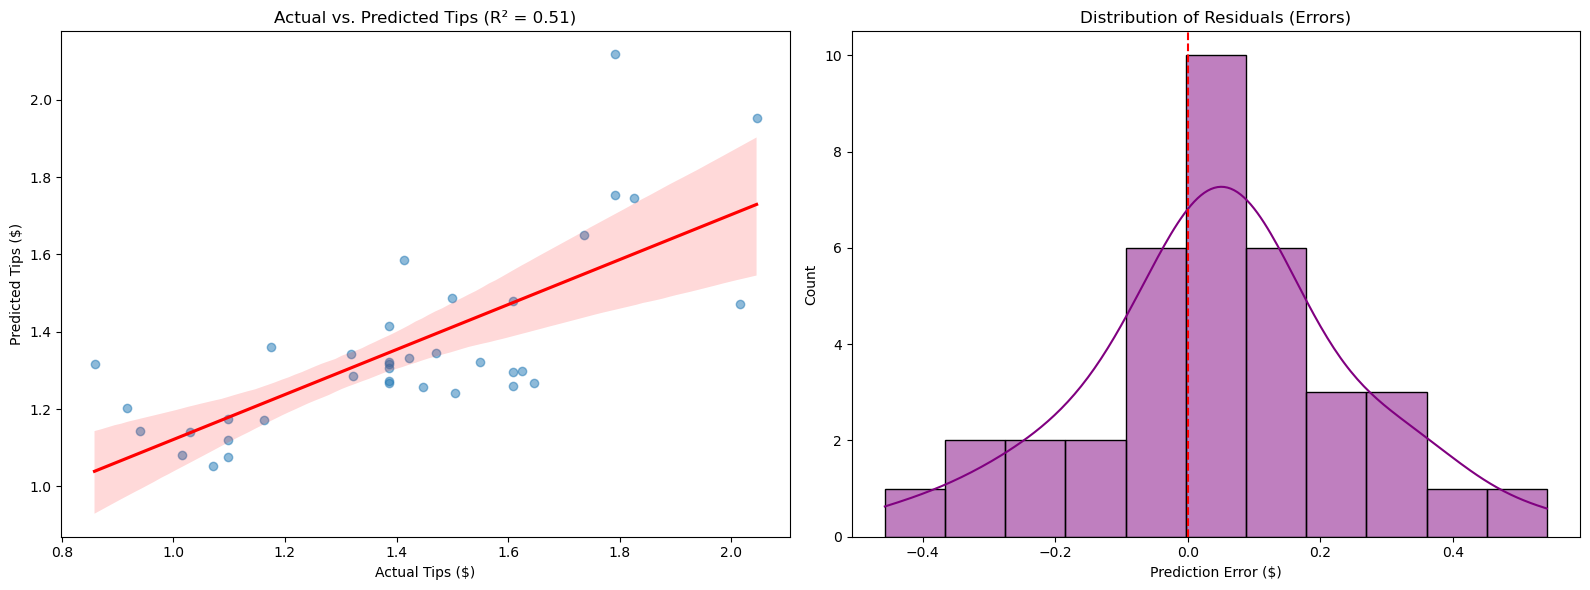

In [ ]:
plt.figure(figsize=(16, 6))

# --- Plot 1: Actual vs Predicted ---
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Tips ($)')
plt.ylabel('Predicted Tips ($)')
plt.title('Actual vs. Predicted Tips (R² = 0.51)')

# --- Plot 2: Residuals Distribution ---
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Prediction Error ($)')
plt.title('Distribution of Residuals (Errors)')

plt.tight_layout()
plt.show()